# Konten

1. Deskripsi Project 
2. Tujuan Project 
3. Pengolahan Data 
        3.1 Inisialisasi
        3.2 Memuat Data 
        3.3 Mepersiapkan Data
        3.4 Analisa Data 
        3.5 Profiling Pengguna 
        3.6 Uji Hipotesa
4. Kesimpulan

# 1. Deskripsi Project 

Toko online "Ice" yang menjual video game dari seluruh dunia. Analyst diminta untuk  mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Sehingga toko online 'Ice' memiliki gambaran terkait kampanye iklan gam apa yang akan dirancang.

# 2. Tujuan Project 

Adapun tujuan dari project ini ialah:
1. Berapa banyak game yang dirilis pada tahun yang berbeda ?
2. Bagaimana penjualan bervariasi dari satu platform ke platform lainnya ?
3. Platform apa yang memiliki total penjualan tertinggi ?
4. Platform apa yang memiliki penurunan populeritas?
5. Berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?
6. Bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer ?
7. Bagaimana penjualan game yang sama di platform lain
8. Genre apa yang paling menguntungkan ?
9. Apa 5 platform tertas untuk negara Amerika Utara, Eropa, dan Jepang?
10. Apa 5 genre tertasa untuk negara Amerika Utara, Eropa, dan Jepang?
11. Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

Adapun hipotesa yang akan dibuktikan dalam project ini ialaha:
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 
2. Rata-rata rating pengguna genre Action dan Sports berbeda.
    

# 3. Pengolahan Data

In [1]:
#Inisialisasi
import pandas as pd 
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import seaborn as sns 

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Berdasarkan informasi umum datasets, dapat dilihat bahwa datasets mengandung 16715 entries dan 10 kolom. Selain itu terdapat missing value pada beberapa kolom yaitu kolom name, year_of_release, genre, critic_scores, user_score, dan rating. 

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Berdasarkan tampilan 5 baris awal datasets, dapat dilihat bahwa Year_of_Release, critic_score dan rating memiliki tipe data yang tidak sesuai.Selain itu nama kolom tidak dalam huruf kecil, sehingga perlu dilakukan penyeragaman nama kolom ke huruf kecil

In [5]:
df = df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales'})
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1454,Doom 3,XB,2005.0,Shooter,0.85,0.43,0.0,0.06,88.0,7.4,M


In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
#mengatasi nilai hilang pada kolom year_of_release
miss_year = (df['year_of_release'].isna().sum()/16715)
f'Persentase missing value pada kolom year {miss_year:.0%}.'

'Persentase missing value pada kolom year 2%.'

Karena nilai yang hilang hanya 2% dari total baris yang dimiliki datasets, maka dalam project ini nilai yang hilang akan akan diganti dengan tahun keluaran game yang memiliki frekuensi tertinggi (paling banyak).

In [8]:
mod_year = df['year_of_release'].mode()
df['year_of_release'] = df['year_of_release'].fillna(2008)

In [9]:
df['year_of_release'].isna().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

Alasan kolom year_of_release diubah menjadi interger ialah agar mempercantik tampilan serta mengingatkan kepada analisa bahwa dengan hanya melihat value tanpa membaca nama kolom, peneliti dapat dengan langsung value tersebut adalah bentuk tahun

In [12]:
#mengatasi missing value pada genre
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Karena terdapat missing value pada kolom genre sebesar 2 baris, maka dalam project ini value yang hilang akan diganti dengan genre yang paling banyak diminati

In [13]:
df['genre'] = df['genre'].fillna('Action')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [14]:
#mengatasi value pada name 
df['name'].value_counts()

Need for Speed: Most Wanted                               12
LEGO Marvel Super Heroes                                   9
Ratatouille                                                9
Madden NFL 07                                              9
FIFA 14                                                    9
                                                          ..
Tiger Woods PGA Tour 2000                                  1
Momotarou Dentetsu World                                   1
Rome: Total War                                            1
Ano Hi Mita Hana no Namae o Bokutachi wa Mada Shiranai     1
Serious Sam Advance                                        1
Name: name, Length: 11559, dtype: int64

Karena terdapat missing value pada kolom genre sebesar 2 baris, maka dalam project ini value yang hilang akan diganti dengan nama yang paling banyak diminati

In [15]:
df['name'] = df['name'].fillna('Need for Speed: Most Wanted')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
#mengatasi missing value pada kolom critic score 
miss_critic = df['critic_score'].isna().sum() / 16715
f'Persentase missing value pada kolom critic score {miss_critic:.0%}.'

'Persentase missing value pada kolom critic score 51%.'

In [17]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

karena jumalh missing value pada kolom ini lebih dari 50% maka missing value perlu dilakukan perbaikan. Dikarenakan gap antar nilai min dan max yang ekstrem maka perbaikan missing value dalam project ini akan diganti denga nilai median.

In [18]:
med_critic = df['critic_score'].median()
med_critic

71.0

In [19]:
df['critic_score'] = df['critic_score'].fillna(71)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [20]:
#mengatasi missing value pada kolom user_score 
miss_user = df['user_score'].isna().sum() / 16715
f'Persentase missing value pada kolom user score {miss_user:.0%}.'

'Persentase missing value pada kolom user score 40%.'

In [21]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.3       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

karena jumalh missing value pada kolom ini mencapai 40% maka missing value perlu dilakukan perbaikan. Selain itu ada hal yang aneh yaitu terdapat value score 'tbd'. Hal ini perlu ditindak lanjuti dilapangan, untuk sementara pada project ini value 'tbd' akan diganti dengan 0.

In [22]:
df['user_score'] = df['user_score'].replace('tbd',0)

In [23]:
df['user_score'].describe()

count     10014
unique       96
top           0
freq       2424
Name: user_score, dtype: int64

Dikarenakan perbedaan antara nilai max dan min sangatlah jauh, maka missing value akan diganti dengan median dari kolom tersebut.

In [24]:
med_user = df['user_score'].median()
df['user_score'] = df['user_score'].fillna(med_user)

In [25]:
df['user_score'] = df['user_score'].apply(float)

Alasan mengubah tipe kolom user_score adalah karena kolom ini berisi angka buka string dan berdasarkan data yang tersimpan value berbentuk bilangan decimal

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
#memperbaiki missing value pada kolom rating 
miss_rating = df['rating'].isna().sum() / 16715
f'Persentase missing value pada kolom rating {miss_rating:.0%}.'

'Persentase missing value pada kolom rating 40%.'

In [28]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Dikarenakan persentase missing value mencapai 40%, maka nilai tersebut akan diganti dengan value yang terbanyak

In [29]:
df['rating'] = df['rating'].fillna('E')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
#menghitung total penjualan diseluruh wilayah untuk setiap game 
df['overall_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
7534,Valkyria Chronicles,PS4,2016,Role-Playing,0.07,0.05,0.05,0.03,71.0,6.9,E,0.2


In [31]:
#Berapa banyak game yang dirilis pada tahun yang berbeda. Apakah data di setiap periode signifikan?
game_year = df.groupby('year_of_release')['name'].count().reset_index()
game_year = game_year.rename(columns={'name':'count_game'})
game_year

,year_of_release,count_game
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'Jumlah Game')

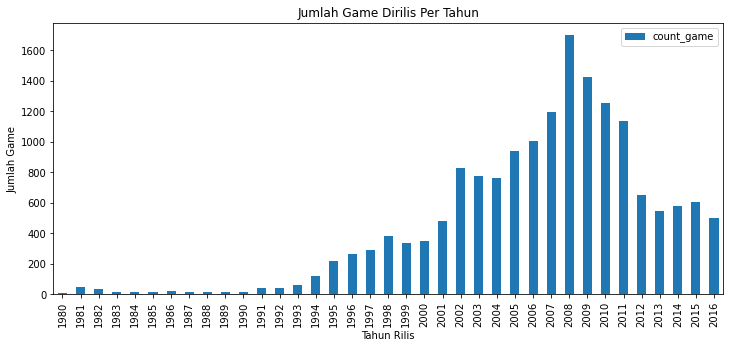

In [32]:
game_year.plot(kind='bar', x='year_of_release', y='count_game', figsize=(12,5))
plt.title('Jumlah Game Dirilis Per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')

Berdasarkan diagram batang yang ditampilkan dapat dilihat bahwa jumlah game yang dirilis mengalami kenaikan dari tahun 1980 hingga 2008. Tahun 2008 tercatat sebagai tahun dengan jumalah game yang dirilis paling banyak yaitu lebih dari 1600 game. Sejak tahun 2008 hingga 2016, jumlah game yang dirilis mengalami penurunan yang signifikan. Walaupun mengalami penurunan tetapi jumlah game yang dirilis masih berada pada kisaran 500 game. 

In [33]:
def period(df):
    year = df['year_of_release']
    if year <=1989 :
        return '1980-1989'
    if year <=1999 :
        return '1990-1999'
    if year <=2009 :
        return '2000-2009'
    if year <=2016 :
        return '2010-2016'
game_year['period'] = game_year.apply(period,axis=1)

In [34]:
game_year.head()

,year_of_release,count_game,period
0,1980,9,1980-1989
1,1981,46,1980-1989
2,1982,36,1980-1989
3,1983,17,1980-1989
4,1984,14,1980-1989


<AxesSubplot:xlabel='period', ylabel='count_game'>

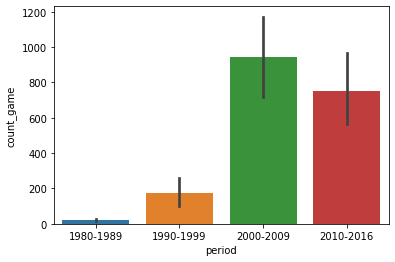

In [35]:
sns.barplot(data=game_year, x='period', y='count_game')

Berdasarkan sebaran jumlah game yang dirilis, dapat dilihat bahwa periode 2000-2009 memiliki jumlah game dirilis paling banyak yakni hampir mendekati 1000

In [36]:
#bagaimana penjualan bervariasi dari satu platform ke platform lainnya
#penjualan platform di wilayah NA 
na_platform = df.groupby('platform').agg({'na_sales':'sum','name':'count'}).reset_index().rename(columns={'name':'game_count'}).sort_values(by='na_sales',ascending=False)
na_platform.head()

,platform,na_sales,game_count
28,X360,602.47,1262
16,PS2,583.84,2161
26,Wii,496.90,1320
17,PS3,393.49,1331
4,DS,382.40,2151


Berdasarkan data, total pendapatan platform terbesar di negara Amerika Utara ialah X360 dengan total pendapatan 602,47 juta USD. Sedangkan secara kuantitas game yang terjual ialah PS2 dengan 2161 unit 

In [37]:
#penjualan platform di wilayah EU
eu_platform = df.groupby('platform').agg({'eu_sales':'sum','name':'count'}).reset_index().rename(columns={'name':'game_count'}).sort_values(by='eu_sales',ascending=False)
eu_platform.head()

,platform,eu_sales,game_count
16,PS2,339.29,2161
17,PS3,330.29,1331
28,X360,270.76,1262
26,Wii,262.21,1320
15,PS,213.61,1197


Berdasarkan data, total pendapatan platform terbesar di negara Eropa ialah PS2 dengan total pendapatan 339.29 juta USD dengan kuantitas game yang terjual ialah PS2 dengan 2161 unit 

In [38]:
#penjualan platform di wilayah Jepang
jp_platform = df.groupby('platform').agg({'jp_sales':'sum','name':'count'}).reset_index().rename(columns={'name':'game_count'}).sort_values(by='jp_sales',ascending=False)
jp_platform.head()

,platform,jp_sales,game_count
4,DS,175.57,2151
15,PS,139.82,1197
16,PS2,139.20,2161
23,SNES,116.55,239
2,3DS,100.67,520


Berdasarkan data, total pendapatan platform terbesar di negara Jepang ialah DS dengan total pendapatan 175.57 juta USD dan secara kuantitas game yang terjual ialah PS2 dengan 2161 unit 

In [39]:
#penjualan platform di wilayah Other
other_platform = df.groupby('platform').agg({'other_sales':'sum','name':'count'}).reset_index().rename(columns={'name':'game_count'}).sort_values(by='other_sales',ascending=False)
other_platform.head()

,platform,other_sales,game_count
16,PS2,193.44,2161
17,PS3,135.68,1331
28,X360,85.76,1262
26,Wii,79.07,1320
4,DS,59.26,2151


Berdasarkan data, total pendapatan platform terbesar di negara selain NA,EU,JP ialah PS2 dengan total pendapatan 193.44	 juta USD dan secara kuantitas game yang terjual ialah 2161 unit 

In [40]:
#penjualan platform di seluruh wilayah
total_platform = df.groupby('platform').agg({'overall_sales':'sum','name':'count'}).reset_index().rename(columns={'name':'game_count'}).sort_values(by='overall_sales',ascending=False)
total_platform.head()

,platform,overall_sales,game_count
16,PS2,1255.77,2161
28,X360,971.42,1262
17,PS3,939.65,1331
26,Wii,907.51,1320
4,DS,806.12,2151


Berdasarkan data, total pendapatan platform terbesar secara global ialah PS2 dengan total pendapatan 1255.77 juta USD dan secara kuantitas game yang terjual ialah 2161 unit 

In [41]:
platform_sales_pivot = df.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
platform_sales_pivot 

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
2600,5.47,0.00,90.60,0.91
3DO,0.00,0.10,0.00,0.00
3DS,61.48,100.67,83.49,13.36
DC,1.69,8.56,5.43,0.27
DS,188.89,175.57,382.40,59.26
GB,47.82,85.12,114.32,8.20
GBA,75.25,47.33,187.54,7.73
GC,38.71,21.58,133.46,5.18
GEN,6.05,2.70,21.05,0.97


Text(0.5, 1.0, 'Pendapatan Platform')

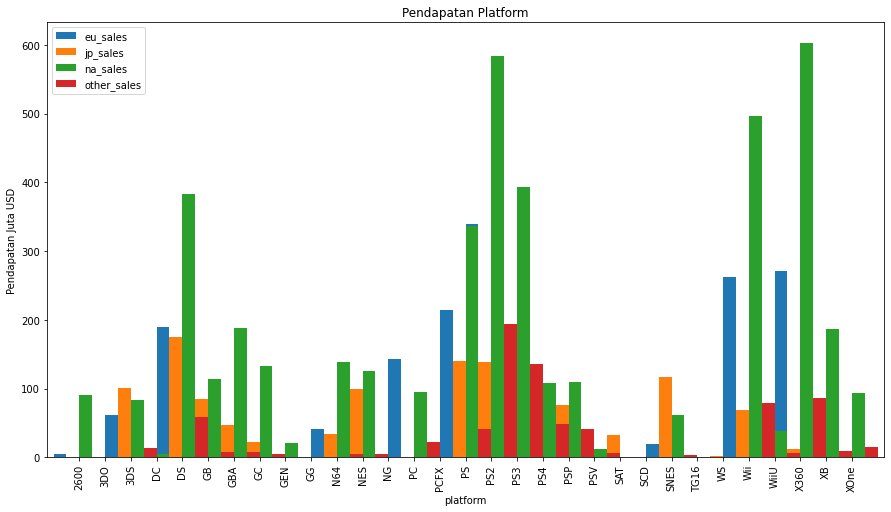

In [42]:
platform_sales_pivot.plot(kind='bar', width=2, figsize=(15,8))
plt.ylabel('Pendapatan Juta USD')
plt.title('Pendapatan Platform')

Berdasarkan data dapat disimpulkan bahwa penjualan game terbanyak berada di negara Amerika Utara dengan platfrom X360 dan PS2 yang mendominasi

In [43]:
#Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun
#paltfrom PS2 dinamai dengan plat_one
ps_two = df.query('platform == "PS2"')

In [44]:
ps_two_pivot = ps_two.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().rename(columns={'name':'game_count'})
ps_two_pivot 

,year_of_release,game_count
0,2000,82
1,2001,185
2,2002,280
3,2003,256
4,2004,259
5,2005,260
6,2006,259
7,2007,214
8,2008,225
9,2009,96


Text(0.5, 1.0, 'Distribusi Platform PS2')

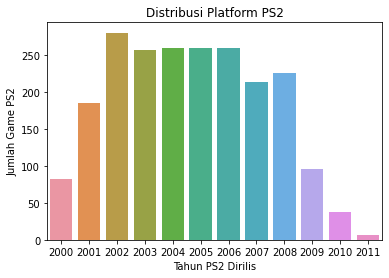

In [45]:
sns.barplot(data=ps_two_pivot, x='year_of_release', y='game_count')
plt.xlabel('Tahun PS2 Dirilis')
plt.ylabel('Jumlah Game PS2')
plt.title('Distribusi Platform PS2')

Berdasarkan hasil grafik dapat dilihat bahwa game PS2 mulai dirilis pada tahun 2000. Platform PS2 bertahan di pasar selama 11 tahun hingga 2011. Berdasarkan data, kepopuleran PS2 dipasar dapat bertahan selama 4 tahun yaitu dari 2003-2006. Secara umum, platform ini memiliki 3 tren yaitu:
1. Tren naik yang signifikan dari 2000 - 2002 dengan total pertumbuhan sebesar lebih dari 150 unit game yang dirilis
2. Tren stagnan dari tahun 2004 - 2006 yang berada di 250 unit game yang dimiliki 
3. Tren turun signifikan setelah 2006 dengan total penurunan kurang lebih 250 unit game

In [46]:
min_plat_year = df.pivot_table(index='platform', values='year_of_release', aggfunc='min')
max_plat_year = df.pivot_table(index='platform', values='year_of_release', aggfunc='max')

In [47]:
merge_plat_year = max_plat_year.merge(min_plat_year, on='platform', how='outer').rename(columns={'year_of_release_x':'max_year','year_of_release_y':'min_year'})
merge_plat_year

,max_year,min_year
platform,,
2600,2008,1980
3DO,1995,1994
3DS,2016,2008
DC,2008,1998
DS,2013,1985
GB,2008,1988
GBA,2008,2000
GC,2008,2001
GEN,1994,1990


In [48]:
merge_plat_year['age'] = merge_plat_year['max_year'] - merge_plat_year['min_year']
merge_plat_year

,max_year,min_year,age
platform,,,
2600,2008,1980,28
3DO,1995,1994,1
3DS,2016,2008,8
DC,2008,1998,10
DS,2013,1985,28
GB,2008,1988,20
GBA,2008,2000,8
GC,2008,2001,7
GEN,1994,1990,4


In [49]:
platform_age_sale = merge_plat_year.merge(total_platform, on='platform', how='outer')
platform_age_sale.sort_values(by='overall_sales',ascending=False)

,platform,max_year,min_year,age,overall_sales,game_count
16,PS2,2011,2000,11,1255.77,2161
28,X360,2016,2005,11,971.42,1262
17,PS3,2016,2006,10,939.65,1331
26,Wii,2016,2006,10,907.51,1320
4,DS,2013,1985,28,806.12,2151
15,PS,2008,1994,14,730.86,1197
6,GBA,2008,2000,8,317.85,822
18,PS4,2016,2013,3,314.14,392
19,PSP,2015,2004,11,294.05,1209
13,PC,2016,1985,31,259.52,974


In [50]:
#mencari platform yang tidak populer lagi sekarang
platform_not_popular = platform_age_sale.query('max_year != 2016')
platform_not_popular.sort_values(by='overall_sales',ascending=False).head()

,platform,max_year,min_year,age,overall_sales,game_count
16,PS2,2011,2000,11,1255.77,2161
4,DS,2013,1985,28,806.12,2151
15,PS,2008,1994,14,730.86,1197
6,GBA,2008,2000,8,317.85,822
19,PSP,2015,2004,11,294.05,1209


In [51]:
platform_not_popular.sort_values(by='game_count',ascending=False).head()

,platform,max_year,min_year,age,overall_sales,game_count
16,PS2,2011,2000,11,1255.77,2161
4,DS,2013,1985,28,806.12,2151
19,PSP,2015,2004,11,294.05,1209
15,PS,2008,1994,14,730.86,1197
29,XB,2008,2000,8,257.74,824


Berdasarkan data, dapat dilihat bahwa platform PS2, DS merupakan 2 platform yang tidak lagi populer saat ini. Total pendapatan dan total game yang dirilis masing-masing dari ketiga paltform ini ialah:
1. PS2 dapat bertahan selama 11 tahun dengan total pendapatan 1255.77 juta USD dengan banyak game yang dirilis 2161 unit
2. DS dapat bertahan selama 28 tahun dengan total 806.12 juta USD dengan banyak game yang dirilis 2151 unit

In [52]:
#menghitung berapa lama waktu yang dibutuhkan untuk populer memudar
df_year = df.loc[df['year_of_release']!=0]

In [53]:
min_release = df_year.pivot_table(index='platform', values='year_of_release',aggfunc='min').rename(columns={'year_of_release':'min_year'}).reset_index()
max_release = df_year.pivot_table(index='platform', values='year_of_release',aggfunc='max').rename(columns={'year_of_release':'max_year'}).reset_index()
min_release,max_release

(   platform  min_year
 0      2600      1980
 1       3DO      1994
 2       3DS      2008
 3        DC      1998
 4        DS      1985
 5        GB      1988
 6       GBA      2000
 7        GC      2001
 8       GEN      1990
 9        GG      1992
 10      N64      1996
 11      NES      1983
 12       NG      1993
 13       PC      1985
 14     PCFX      1996
 15       PS      1994
 16      PS2      2000
 17      PS3      2006
 18      PS4      2013
 19      PSP      2004
 20      PSV      2008
 21      SAT      1994
 22      SCD      1993
 23     SNES      1990
 24     TG16      1995
 25       WS      1999
 26      Wii      2006
 27     WiiU      2012
 28     X360      2005
 29       XB      2000
 30     XOne      2013,
    platform  max_year
 0      2600      2008
 1       3DO      1995
 2       3DS      2016
 3        DC      2008
 4        DS      2013
 5        GB      2008
 6       GBA      2008
 7        GC      2008
 8       GEN      1994
 9        GG      1992
 10      N

In [54]:
platform_year = min_release.merge(max_release, on='platform', how='outer')
platform_year['age'] = platform_year['max_year'] - platform_year['min_year']
platform_year

,platform,min_year,max_year,age
0,2600,1980,2008,28
1,3DO,1994,1995,1
2,3DS,2008,2016,8
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2008,20
6,GBA,2000,2008,8
7,GC,2001,2008,7
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [55]:
lifetime = df_year.groupby(['platform','year_of_release']).agg({'name':'count','overall_sales':'sum'}).reset_index()
lifetime = lifetime.merge(platform_year, on='platform').sort_values(by='min_year').reset_index()
lifetime = lifetime.rename(columns={'name':'game_count'})
lifetime.head()

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age
0,0,2600,1980,9,11.38,1980,2008,28
1,9,2600,1989,2,0.63,1980,2008,28
2,8,2600,1988,2,0.74,1980,2008,28
3,7,2600,1987,6,1.94,1980,2008,28
4,6,2600,1986,2,0.67,1980,2008,28


In [56]:
def popular(lifetime):
    age = lifetime['age']
    if age <= 5:
        return '0-5'
    elif age <= 10:
        return '6-10'
    elif age <= 15:
        return '11-15'
    elif age <= 20:
        return '16-20'
    elif age <= 25:
        return '21-25'
    return '>20'

lifetime['popular'] = lifetime.apply(popular,axis=1)

In [57]:
lifetime

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age,popular
0,0,2600,1980,9,11.38,1980,2008,28,>20
1,9,2600,1989,2,0.63,1980,2008,28,>20
2,8,2600,1988,2,0.74,1980,2008,28,>20
3,7,2600,1987,6,1.94,1980,2008,28,>20
4,6,2600,1986,2,0.67,1980,2008,28,>20
...,...,...,...,...,...,...,...,...,...
241,161,PS4,2014,75,100.00,2013,2016,3,0-5
242,160,PS4,2013,16,25.99,2013,2016,3,0-5
243,242,XOne,2013,19,18.96,2013,2016,3,0-5
244,243,XOne,2014,61,54.07,2013,2016,3,0-5


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

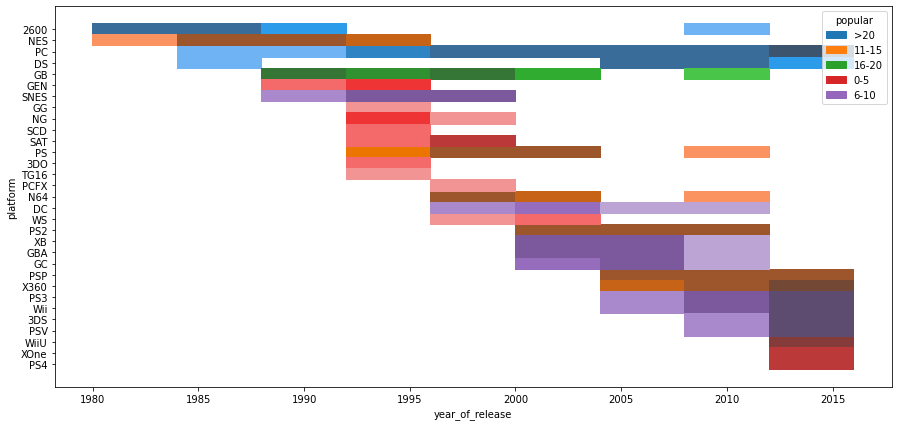

In [58]:
plt.figure(figsize=(15,7))
sns.histplot(data=lifetime, x='year_of_release', y='platform', hue='popular')

In [59]:
lifetime['popular'].value_counts()

6-10     79
11-15    67
>20      48
0-5      38
16-20    14
Name: popular, dtype: int64

Dalam menentukan lifetime popularitas suatu platfom dilakukan pembagian lifetime per 5 tahun. Berdasarkan hasil dapat dilihat bahwa paling cepat popularitas platform menurutn ialah 0-5 tahun. 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

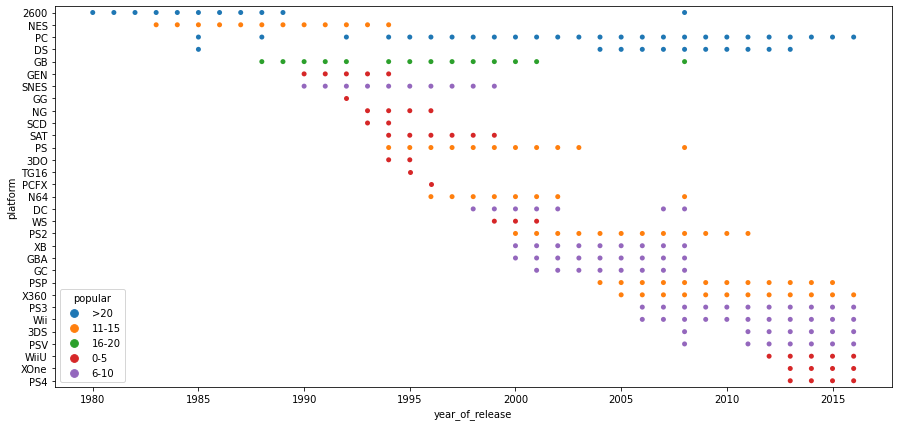

In [60]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=lifetime, x='year_of_release', y='platform', hue='popular')

Berdasarkan diagram sebaran data dapat dilihat bahwa waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya ialah 0 hingga 3 tahun 

Text(0.5, 1.0, 'Penjualan Platform Global')

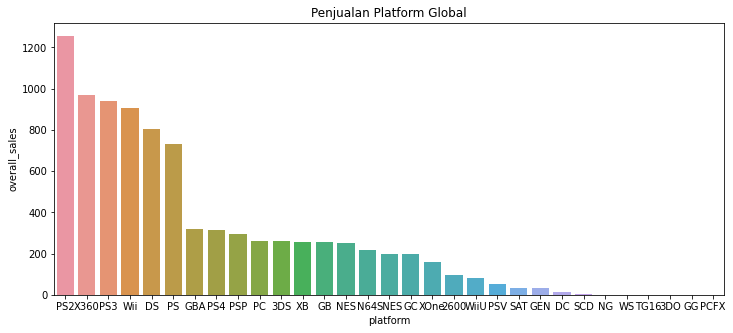

In [61]:
#Platform mana saja yang memiliki penjualan terbanyak?
plt.figure(figsize=(12,5))
sns.barplot(data=total_platform, x='platform', y='overall_sales')
plt.title('Penjualan Platform Global')

Berdasarkan data dapat dilihat bahwa PS2 merupakan platform yang memiliki penjualan tertinggi

In [62]:
#Platform mana saja yang tumbuh atau menyusut?
#ditujukan untuk membangun model bagi tahun 2017
#periode yang digunakan untuk membangun model tahun 2017 ialah periode 2011-2016
data_reference_forecast = lifetime.loc[lifetime['year_of_release'] >= 2011].reset_index(drop=True).sort_values(by='year_of_release')
data_reference_forecast

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age,popular
28,154,PS3,2011,215,156.78,2006,2016,10,6-10
35,177,PSV,2011,18,4.63,2008,2016,8,6-10
27,210,Wii,2011,143,59.65,2006,2016,10,6-10
41,14,3DS,2011,116,63.20,2008,2016,8,6-10
13,171,PSP,2011,139,17.82,2004,2015,11,11-15
9,148,PS2,2011,7,0.45,2000,2011,11,11-15
7,35,DS,2011,153,26.18,1985,2013,28,>20
15,227,X360,2011,206,143.84,2005,2016,11,11-15
4,119,PC,2011,139,35.03,1985,2016,31,>20
46,216,WiiU,2012,32,17.56,2012,2016,4,0-5


Text(0.5, 1.0, 'Pertumbuhan Platform Periode 2011-2016')

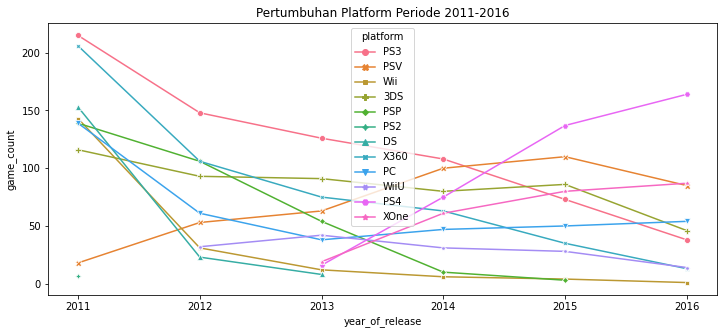

In [63]:
plt.figure(figsize=(12,5))
sns.lineplot(data=data_reference_forecast,x='year_of_release', y='game_count',hue='platform', style='platform', dashes=False, markers=True)
plt.title('Pertumbuhan Platform Periode 2011-2016')

1. Berdasarkan diagram garis yangd ditampilkan, dapat dilihat bahwa platform yang mengalami kenaikan selama periode 2011-2016 ialah PS4 dan XOne. 
2. Platform PSV mengalami trend naik dari tahun 2011, tetapi pada tahun 2015-2016 mengalami penurunan.
3. Selain dari PS4 XOne dan PSV mengalami trend turun dari waktu ke waktu

In [64]:
#platform yang berpontesi menghasilkan keuntungan 
# berdasarkan hasil analisa popularitas platform dapat bertahan 0-5 tahun serta jarak antar platform baru dengan yang lama ialah 0-3 tahun
#untuk mencari platform yang berpotensi menghasilkan keuntungan akan mengggunakan data pendapatan global yang mana year_of release dalam rentang 2014-2016
sale_three_year_back = lifetime.loc[lifetime['year_of_release'] >= 2014].sort_values(by='year_of_release',ascending=False).reset_index(drop=True)
sale_three_year_back

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age,popular
0,124,PC,2016,54,5.25,1985,2016,31,>20
1,232,X360,2016,13,1.52,2005,2016,11,11-15
2,163,PS4,2016,164,69.25,2013,2016,3,0-5
3,220,WiiU,2016,14,4.60,2012,2016,4,0-5
4,182,PSV,2016,85,4.25,2008,2016,8,6-10
5,215,Wii,2016,1,0.18,2006,2016,10,6-10
6,159,PS3,2016,38,3.60,2006,2016,10,6-10
7,19,3DS,2016,46,15.14,2008,2016,8,6-10
8,245,XOne,2016,87,26.15,2013,2016,3,0-5
9,219,WiiU,2015,28,16.35,2012,2016,4,0-5


Text(0.5, 1.0, 'Pertumbuhan Platform Periode 2014-2016')

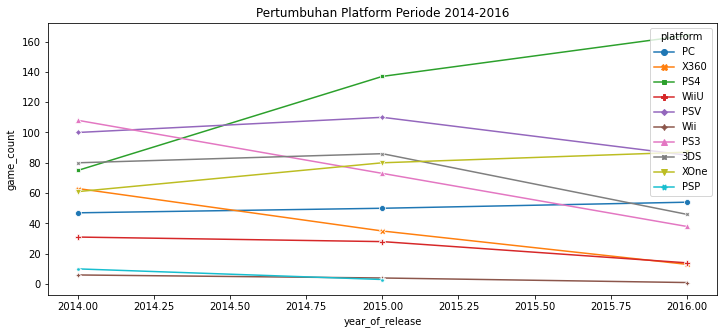

In [65]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sale_three_year_back,x='year_of_release', y='game_count',hue='platform', style='platform', dashes=False, markers=True)
plt.title('Pertumbuhan Platform Periode 2014-2016')

In [66]:
sale_three_year_back.query('platform == "PS4"').value_counts()

index  platform  year_of_release  game_count  overall_sales  min_year  max_year  age  popular
161    PS4       2014             75          100.00         2013      2016      3    0-5        1
162    PS4       2015             137         118.90         2013      2016      3    0-5        1
163    PS4       2016             164         69.25          2013      2016      3    0-5        1
dtype: int64

In [67]:
sale_three_year_back.loc[sale_three_year_back['platform'] == 'PS4'].agg({'overall_sales':'sum','game_count':'sum'})

overall_sales    288.15
game_count       376.00
dtype: float64

Berdasarkan tampilan data, dapat dilihat bahwa platform yang berpotensi menghasilkan keuntungan ialah PS4. Total penjualan PS4 pada tahun 2016 adalah 288,15 juta USD yang setara dengan 376 game yang dirilis. Selain itu berdasarkan data lama waktu populer, diketahui bahwa tingkat populeritas suatu platform dapat bertahan maksimum 5 tahun dengan selang maksimum 3 tahun sekali terdapat paltform baru yang muncul. Sehingga, PS4 masih memiliki waktu 2 tahun lagi untuk meraup keuntungan yang tinggi. 

In [68]:
df=df.rename(columns={'total_sales':'overall_sales'})
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
16240,IL-2 Sturmovik,PC,2001,Simulation,0.0,0.01,0.0,0.0,91.0,8.8,T,0.01


In [69]:
lifetime.sample()

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age,popular
63,42,GB,1992,7,25.49,1988,2008,20,16-20


In [70]:
#Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform
global_sales = lifetime.sort_values(by='overall_sales',ascending=False)
global_sales.head()

,index,platform,year_of_release,game_count,overall_sales,min_year,max_year,age,popular
153,141,PS2,2004,259,211.81,2000,2011,11,11-15
206,208,Wii,2009,325,206.97,2006,2016,10,6-10
155,139,PS2,2002,280,205.38,2000,2011,11,11-15
217,207,Wii,2008,316,187.65,2006,2016,10,6-10
154,140,PS2,2003,256,184.31,2000,2011,11,11-15


Text(0.5, 1.0, 'Boxplot Pendapatan Platform Global')

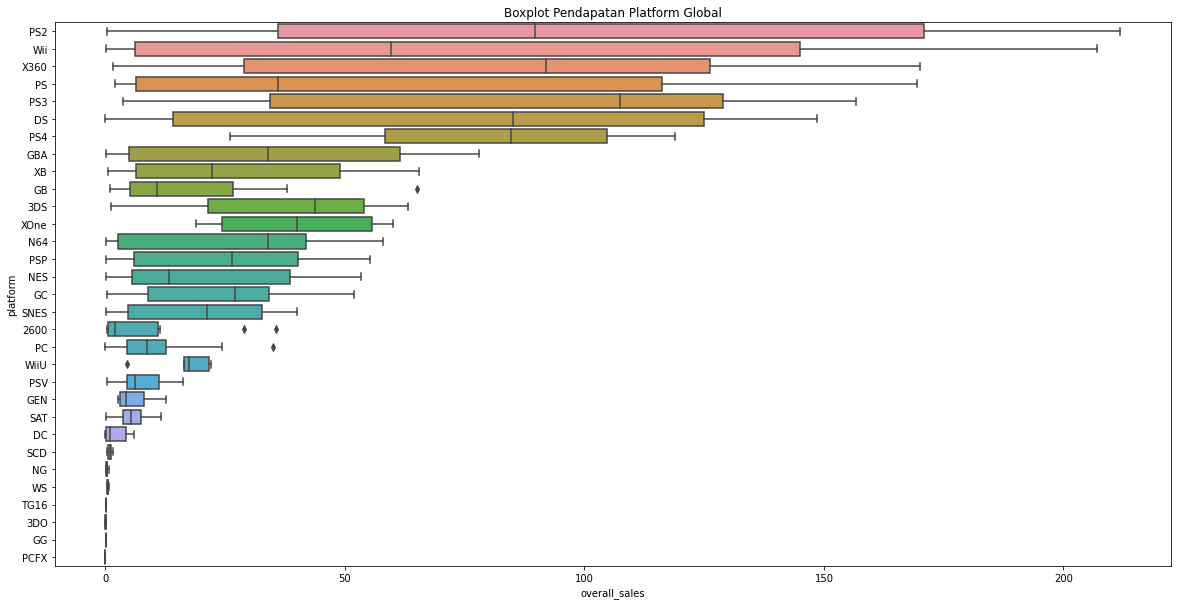

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(data=global_sales, y='platform', x='overall_sales', width=0.8)
plt.title('Boxplot Pendapatan Platform Global')

Berdasarkan boxplot, dapat dilihat bahwa:
1. Platform PS2 merupakan platform dengan pendapatan global tertinggi 
2. Rata-rata pendapatan global antar platfrom berbeda-beada
3. Platfrom yang diperkirakan masih mendapatkan keuntungan yang tinggi ialah platform PS2, Wii, dan PS.

Point ke 3 didasari atas visual sebaran data pendapatan global dimana PS2, Wii dan PS memiliki positive skewness dimana nilai mean akan lebih besar dari pada nilai median maupun mode (mode < median < mean). Artinya nilai rata-rata pendapatan total ketiga platform tersebut tinggi

In [72]:
#hitung korelasi antara ulasan (ciritic_score, user_score) dan penjualan untuk PS2
ps_two.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
6204,Real Pool,PS2,2000,Sports,0.14,0.11,0.0,0.04,54.0,0.0,E,0.29


In [73]:
ps_two['review'] = ((ps_two['critic_score']/10) + ps_two['user_score']) / 2
ps_two.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,review
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,9.25
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,9.10
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,8.95
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10,9.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65,8.70


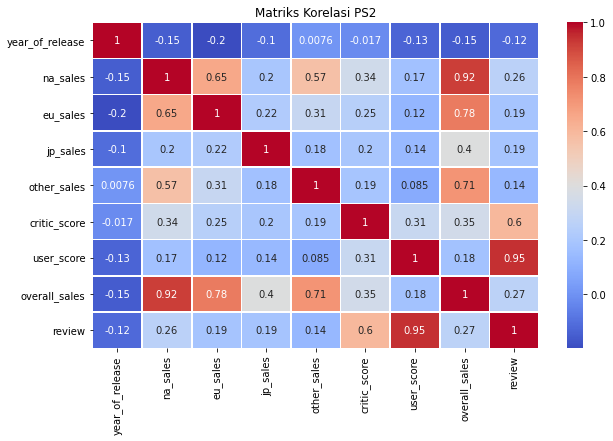

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(ps_two.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriks Korelasi PS2')
plt.show()

In [75]:
'Korelasi antar ciritc score dengan pendapatan global PS2 ialah', ps_two['critic_score'].corr(ps_two['overall_sales'])

('Korelasi antar ciritc score dengan pendapatan global PS2 ialah',
 0.34547657246003677)

In [76]:
'Korelasi antar user score dengan pendapatan global PS2 ialah', ps_two['user_score'].corr(ps_two['overall_sales'])

('Korelasi antar user score dengan pendapatan global PS2 ialah',
 0.17869555733198753)

In [77]:
'Korelasi antar data review dengan pendapatan global PS2 ialah', ps_two['review'].corr(ps_two['overall_sales'])

('Korelasi antar data review dengan pendapatan global PS2 ialah',
 0.26739005077795486)

Berdasarkan hasil korelasi dapat diketahui bahwa critic score, user score dan nilai review secara keseluruhan memiliki tingkat interfensi yang rendah dengan pendapatan global platform PS2

Text(0.5, 1.0, 'Scatterplot Critic Score vs Global Sales PS2')

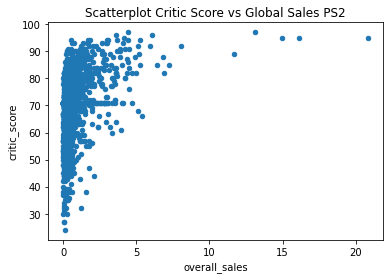

In [78]:
ps_two.plot(x='overall_sales', y='critic_score', kind='scatter')
plt.title('Scatterplot Critic Score vs Global Sales PS2')

Text(0.5, 1.0, 'Scatterplot User Score vs Global Sales PS2')

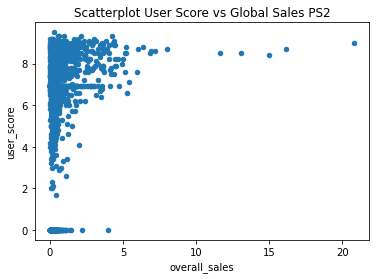

In [79]:
ps_two.plot(x='overall_sales', y='user_score', kind='scatter')
plt.title('Scatterplot User Score vs Global Sales PS2')

Text(0.5, 1.0, 'Scatterplot Review Score Global vs Global Sales PS2')

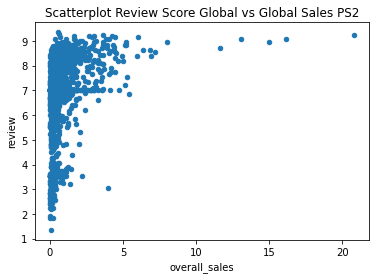

In [80]:
ps_two.plot(x='overall_sales', y='review', kind='scatter')
plt.title('Scatterplot Review Score Global vs Global Sales PS2')

Berdasarkan hasil scatter dapat dilihat bahwa :
1. Rentang nilai dari kritikus terahadap game PS2 yang paling banyak ditemukan ialah 40-90 
2. Rentang skor ulasan dari pengguna terhadap game PS2 yang paling banyak ditemukan ialah 6 - 8 
3. Secara keseluruhan rata-rata nilai game PS2 yang dirilis berkisar pada rentang 6 - 9 

In [81]:
#Cek Pengaruh Ulasan terhadap penjualan platform lain
wii_platform = df.query('platform == "Wii"').reset_index()
wii_platform.sample()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
777,8958,Trivial Pursuit: Bet You Know It,Wii,2011,Misc,0.09,0.04,0.0,0.01,71.0,0.0,T,0.14


In [82]:
wii_platform['review'] = ((wii_platform['critic_score']/10) + wii_platform['user_score']) / 2
wii_platform.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,review
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.80
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,8.25
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,8.00
3,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,6.20
4,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,8.55


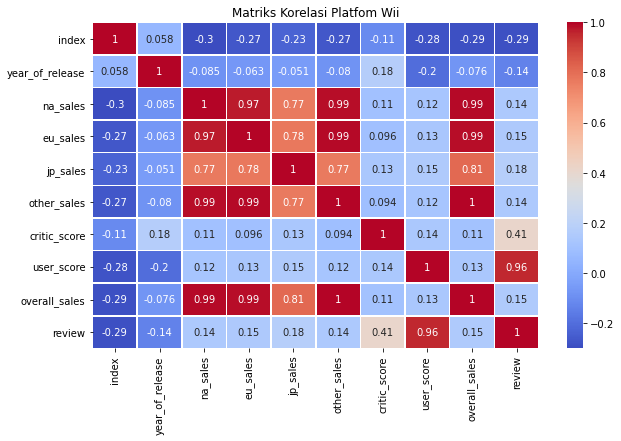

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(wii_platform.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriks Korelasi Platfom Wii')
plt.show()

Berdasarkan data korelasi, dapat dilihat bahwa
1. Pengaruh ulasan dari kritikus terdahap pendapatan global platfrom wii adalah rendah dengan nilai 0.11
2. Pengaruh ulasan dari pengguna terhadap pendapatan global platform wii adalah rendah dengan nilai 0.13
3. Pengaruh ulasan secara keseluruhan terdahap pendapatan global platform wii adalah rendah dengan nilai 0.15 

Text(0.5, 1.0, 'Scatterplot Critic Score vs Global Sales Wii')

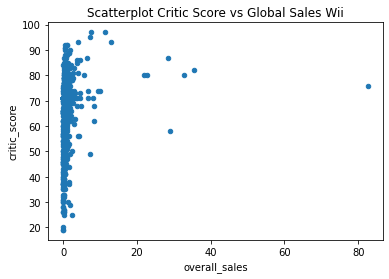

In [84]:
wii_platform.plot(x='overall_sales', y='critic_score', kind='scatter')
plt.title('Scatterplot Critic Score vs Global Sales Wii')

Text(0.5, 1.0, 'Scatterplot User Score vs Global Sales Wii')

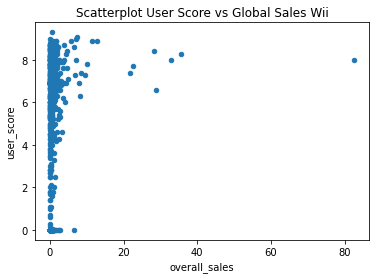

In [85]:
wii_platform.plot(x='overall_sales', y='user_score', kind='scatter')
plt.title('Scatterplot User Score vs Global Sales Wii')

Text(0.5, 1.0, 'Scatterplot Review vs Global Sales Wii')

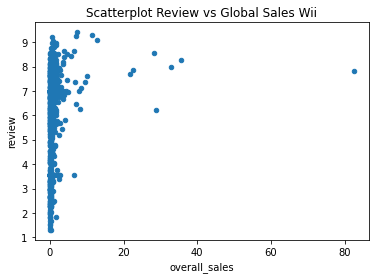

In [86]:
wii_platform.plot(x='overall_sales', y='review', kind='scatter')
plt.title('Scatterplot Review vs Global Sales Wii')

Berdasarkan hasil scatter dapat dilihat bahwa :
1. Rentang nilai dari kritikus terahadap game Wii yang paling banyak ditemukan ialah 60-80 
2. Rentang skor ulasan dari pengguna terhadap game Wii yang paling banyak ditemukan ialah 6 - 8 
3. Secara keseluruhan rata-rata nilai game Wii yang dirilis berkisar pada 7 

In [87]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
4703,F1 2014,PS3,2014,Racing,0.07,0.26,0.02,0.06,62.0,4.1,E,0.41


In [88]:
#distribusi umum game berdasarkan genre
genre_game = df.pivot_table(index='genre', values='name', aggfunc='count',margins=True).reset_index().drop(12).sort_values(by='name',ascending=False)
genre_game

,genre,name
0,Action,3371
10,Sports,2348
3,Misc,1750
7,Role-Playing,1498
8,Shooter,1323
1,Adventure,1303
6,Racing,1249
4,Platform,888
9,Simulation,873
2,Fighting,849


In [89]:
#sebaran penjualan genre 
genre_sales = df.groupby('genre').agg({'overall_sales':'sum'}).reset_index().sort_values(by='overall_sales',ascending=False)
genre_sales

,genre,overall_sales
0,Action,1746.59
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


In [90]:
data_genre = genre_game.merge(genre_sales, on='genre', how='outer')
data_genre

,genre,name,overall_sales
0,Action,3371,1746.59
1,Sports,2348,1331.27
2,Misc,1750,802.51
3,Role-Playing,1498,934.56
4,Shooter,1323,1052.45
5,Adventure,1303,237.59
6,Racing,1249,728.67
7,Platform,888,827.77
8,Simulation,873,389.97
9,Fighting,849,447.53


Text(0.5, 1.0, 'Genre vs Overall Sales')

<Figure size 1080x720 with 0 Axes>

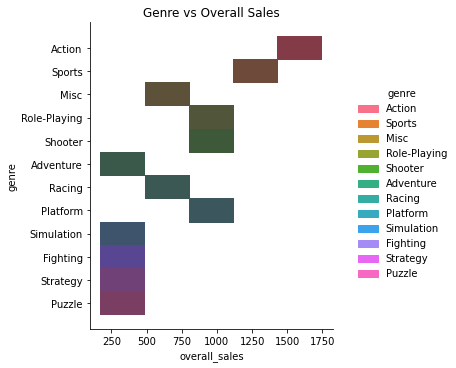

In [91]:
plt.figure(figsize=(15,10))
sns.displot(data=data_genre, y='genre', x='overall_sales', hue='genre')
plt.title('Genre vs Overall Sales')

Text(0.5, 1.0, 'Genre vs Number of Game Released')

<Figure size 1080x720 with 0 Axes>

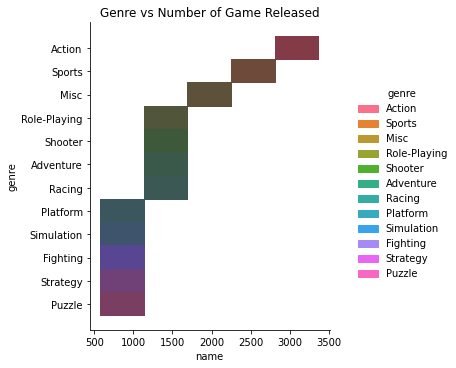

In [92]:
plt.figure(figsize=(15,10))
sns.displot(data=data_genre, y='genre', x='name', hue='genre')
plt.title('Genre vs Number of Game Released')

Berdasarkan hasil distribusi, dapat diketahui bahwa:
1. Genre action dan sport merupakan genre yang paling banyak diminati pasar dengan total pendapatan setara dengan 1746.59 juta USD dan 1331.27 juta USD
2. Genre action dan sport merupakan genre yang paling banyak dirilis dengan total game sebesar 3371 dan 2348 unit
3. Pendaptan game terendah ialah game dengan genre simulasi, fight, puzzel dan strategy, dimana total pendatapan game ini kurang dari 500 juta USD 
4. Jumlah game yang dirilis untuk genre simulasi, fight, puzzel dan strategy ialah kurang dari 1000 unit

In [93]:
#profiling untuk negara NA, EU, JP
na_genre = df.groupby('genre').agg({'name':'count','na_sales':'sum'}).rename(columns={'name':'game_count'})
na_genre.sort_values(by='na_sales',ascending=False).head()

,game_count,na_sales
genre,,
Action,3371,880.79
Sports,2348,684.43
Shooter,1323,592.24
Platform,888,445.50
Misc,1750,407.27


In [94]:
eu_genre = df.groupby('genre').agg({'name':'count','eu_sales':'sum'}).rename(columns={'name':'game_count'})
eu_genre.sort_values(by='eu_sales',ascending=False).head()

,game_count,eu_sales
genre,,
Action,3371,519.66
Sports,2348,376.79
Shooter,1323,317.34
Racing,1249,236.51
Misc,1750,212.74


In [95]:
jp_genre = df.groupby('genre').agg({'name':'count','jp_sales':'sum'}).rename(columns={'name':'game_count'})
jp_genre.sort_values(by='jp_sales',ascending=False).head()

,game_count,jp_sales
genre,,
Role-Playing,1498,355.41
Action,3371,161.46
Sports,2348,135.54
Platform,888,130.83
Misc,1750,108.11


Analisa data dilakukan: Parameter yang paling banyak diminati disuatu negara bergantung pada jumlah pendapatan yang diperoleh untuk genre tersebut

Berdasarkan hasil dapat dilihat bahwa:
1. 5 Genre yang paling banyak diminati di negara Amerika Utara ialah action,sport,shooter,platform dan misc
2. 5 Genre yang paling banyak diminati di negara Eropa ialah action, sport, shooter, racing dan misc
3. 5 Genre yang paling banyak diminati di negara Jepang ialah role-playing, action, sport, paltform dan misc

Secara keseluruhan, ketiga negara memiliki 2 genre yang sama yaitu action dan sports

In [96]:
na_plat = df.groupby('platform').agg({'name':'count','na_sales':'sum'}).rename(columns={'name':'game_count'})
na_plat.sort_values(by='na_sales',ascending=False).head()

,game_count,na_sales
platform,,
X360,1262,602.47
PS2,2161,583.84
Wii,1320,496.90
PS3,1331,393.49
DS,2151,382.40


In [97]:
eu_plat = df.groupby('platform').agg({'name':'count','eu_sales':'sum'}).rename(columns={'name':'game_count'})
eu_plat.sort_values(by='eu_sales',ascending=False).head()

,game_count,eu_sales
platform,,
PS2,2161,339.29
PS3,1331,330.29
X360,1262,270.76
Wii,1320,262.21
PS,1197,213.61


In [98]:
jp_plat = df.groupby('platform').agg({'name':'count','jp_sales':'sum'}).rename(columns={'name':'game_count'})
jp_plat.sort_values(by='jp_sales',ascending=False).head()

,game_count,jp_sales
platform,,
DS,2151,175.57
PS,1197,139.82
PS2,2161,139.20
SNES,239,116.55
3DS,520,100.67


Analisa data dilakukan: Parameter yang paling banyak diminati disuatu negara bergantung pada jumlah pendapatan yang diperoleh untuk platform tersebut

Berdasarkan hasil dapat dilihat bahwa:
1. 5 Platform yang paling banyak diminati di negara Amerika Utara ialah X360, PS2, Wii, PS3, DS
2. 5 Platform yang paling banyak diminati di negara Eropa ialah PS2, PS3, X360, Wii, PS
3. 5 Platform yang paling banyak diminati di negara Jepang ialah DS, PS, PS2, SNES, 3DS

Secara keseluruhan, ketiga negara memiliki 1 platform yang sama yaitu PS2

In [99]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
9138,Gretzky NHL 06,PS2,2005,Sports,0.07,0.05,0.0,0.02,62.0,0.0,E10+,0.14


In [100]:
#Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?
region_rating = df.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales',ascending=False)
region_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,2535.45,1324.08,1040.07
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.52,40.20
K-A,2.56,0.27,1.46
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


Text(0, 0.5, 'Region sales')

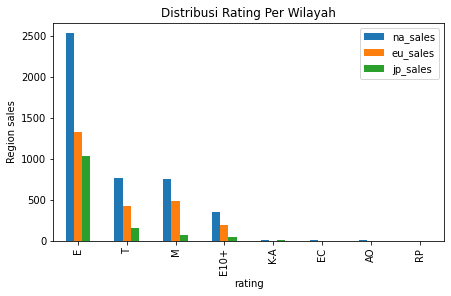

In [101]:
region_rating.plot(kind='bar', figsize=(7,4))
plt.title('Distribusi Rating Per Wilayah')
plt.ylabel('Region sales')

Berdasrakan data visualisasi, dapat dilihat bahwa penjualan game terbanyak ialah game dengan rating E. Hubungan antar rating dengan penjualan dapat disimpulkan memiliki hubungan, walaupun tidak dapat diketahui sebesar besar pengaruhnya tetapi jika menarik analisa berdasarkan visualisasi dapat dikethaui bahwa rating erat hubungannya dengan penjualan game dimana game dengan rating selain E memperoleh pendapatan yang kecil hingga tidak memiliki pendapatan

In [102]:
#konversi alphabet rating menjadi angka 
def rate(df):
    rating = df['rating']
    if rating == 'E':
        return 1
    elif rating =='T':
        return 2
    elif rating =='M':
        return 3
    elif rating =='E10+':
        return 4
    elif rating =='K-A':
        return 5
    elif rating =='EC':
        return 6
    elif rating =='AO':
        return 7
    elif rating =='RP':
        return 8
    return 0
    
df['rating_number'] = df.apply(rate,axis=1)    

In [103]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,rating_number
784,Dynasty Warriors 4,PS2,2003,Action,0.63,0.21,1.13,0.13,78.0,9.3,T,2.1,2


In [104]:
#uji hipotesa 1
#H0 = rata-rata rating platform XOne dan PC adalah sama
pc_data = df.query('platform == "PC"')
pc_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,rating_number
15910,The Incredibles: Rise of the Underminer,PC,2005,Action,0.01,0.0,0.0,0.0,65.0,0.0,E10+,0.01,4


In [105]:
xone_data = df.query('platform == "XOne"')
xone_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,rating_number
9805,Destiny: The Collection,XOne,2016,Shooter,0.05,0.06,0.0,0.01,71.0,0.0,T,0.12,2


In [106]:
#mencari variance 
var_xone_rating = np.var(xone_data['rating_number'])
var_pc_rating = np.var(pc_data['rating_number'])
print('Variance rating platform XOne adalah :',var_xone_rating) 
print('Variance rating platform PC adalah :',var_pc_rating)

Variance rating platform XOne adalah : 1.203494566375453
Variance rating platform PC adalah : 1.0732220484127355


Berdasarkan hasil kalkulasi variance, dapat dilihat bahwa nilai variance tidak terlalu berbeda jauh, sehingga dalam project ini variance yang digunakan adalah True

In [107]:
alpha = 0.05
#menggunakan equal_var = true karena variance antar populasi mirip
platform_rating = st.stats.ttest_ind(xone_data['rating_number'],pc_data['rating_number'],equal_var=True)
print('p-value: ', platform_rating.pvalue)
if (platform_rating.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value:  0.9942345088582843
Kita tidak bisa menolak hipotesis nol


/tmp/ipykernel_137/3006059325.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  platform_rating = st.stats.ttest_ind(xone_data['rating_number'],pc_data['rating_number'],equal_var=True)


Berdasarkan hasil uji t-tes dapat dilihat bahwa hasil p-value lebih besar dari pada alpha yang digunakan, sehingga kita tidak bisa menolak H0. Artinya rata-rata rating pengguna untuk kedua platform adalah sama

In [108]:
#uji hipotesa 2
#h0= Rata-rata rating pengguna genre Action dan Sports berbeda.
action_data = df.query('genre == "Action"')
action_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,rating_number
12053,Doraemon: Nobita to Himitsu Dougu Hakubutsukan,3DS,2013,Action,0.0,0.0,0.07,0.0,71.0,6.9,E,0.07,1


In [109]:
sports_data = df.query('genre == "Sports"')
sports_data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales,rating_number
2893,NCAA Football 09,X360,2008,Sports,0.65,0.0,0.0,0.05,83.0,7.7,E,0.7,1


In [110]:
#mencari variance 
var_action_rating = np.var(action_data['rating_number'])
var_sports_rating = np.var(sports_data['rating_number'])
print('Variance rating platform XOne adalah :',var_action_rating) 
print('Variance rating platform PC adalah :',var_sports_rating)

Variance rating platform XOne adalah : 1.2375797510674615
Variance rating platform PC adalah : 0.4666516358116952


Berdasarkan hasil perhitungan variance, dapat diketahui bahwa nilai variance antar keduanya jauh berbeda. Maka, pada perhtiungan hipotesa 2 variance akan bernilai False

In [111]:
alpha = 0.05
#menggunakan equal_var = false karena variance antar populasi jauh berbeda
genre_rating = st.stats.ttest_ind(action_data['rating_number'],sports_data['rating_number'],equal_var=False)
print('p-value: ', genre_rating.pvalue)
if (genre_rating.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value:  1.212220111454673e-205
Kita menolak hipotesis nol


/tmp/ipykernel_137/3153556224.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  genre_rating = st.stats.ttest_ind(action_data['rating_number'],sports_data['rating_number'],equal_var=False)


Berdasarkan hasil uji t-tes dapat dilihat bahwa hasil p-value lebih kecil dari pada alpha yang digunakan, sehingga kita menolak H0. Artinya rata-rata rating pengguna untuk kedua genre tidaklah berbeda (sama)

Kesimpulan yang diperoleh 
Pra-pemprosesan data: 
1. Terdapat missing values pada kolom platform, year of release, genre, critic score dan rating

2. Mengganti missing value dengan median atau dengan value yang memiliki frequensi yang tinggi

3. Terdapat tipe data yang tidak sesuai di kolom year of sales, user score 

Analisa data:
1. Platform yang memiliki pendatapan tertinggi secara global ialah PS2 dengan total pendapatan ialah 1255.77 juta USD

2. Platform PS2 pertama kali dirilis pada tahun 2000. Lama PS2 populer ialah 11 tahun hingga 2011. Jumlah game yang dirilis terbanyak pada platform PS2 tercatat pada tahun 2002 yakni lebih dari 250 unit game, sedangkan jumlah game terkecil tercatat pada tahun 2011 yakni kurang dari 50 game.

3. Tingkat popularitas akan menurun paling cepat 0-5 tahun. 

4. Setiap 1-3 tahun sekali terjadi pertumbuhan platform baru 

5. PS2 merupakan platform yang diperkirakan masih dapat mengambil keuntungan pada tahun 2017

6. Terdapat korelasi yang rendah antar ulasan dengan total pendapatan global suatu platform 

7. Genre game dengan jumlah game terbanyak yang dirilis ialah action, sport, misc

8. Genre game dengan total pendapatan terbesar ialah Action dengan 1746,59 juta USD, Sports dengan 1331.27 juta USD, dan Shooter dengan 1052.45  juta USD. 

9. 5 Genre yang paling banyak diminati di negara Amerika Utara ialah action,sport,shooter,platform dan misc

10. 5 Genre yang paling banyak diminati di negara Eropa ialah action, sport, shooter, racing dan misc

11. 5 Genre yang paling banyak diminati di negara Jepang ialah role-playing, action, sport, paltform dan misc

12. Rating dapat mempengaruhi penjualan game disuatu platform

13. Hipotesa yang menyatakan rata-rata rating pengguna XOne dan PC adalah sama tidak dapat ditolak. P-value yang dihasilkan ialah 0.99. Alpha yang digunakan adalah 0.05

14. Hipotesa yang menyatakan rata-rata rating genre Actions dan sports berbeda harus ditolak. P-value yang dihasilkan ialah 1.21e-205. Alpha yang digunakan adalah 0.05 